# Ejemplo PCA

In [25]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
cancer = load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
len(cancer.data[cancer.target==1])

357

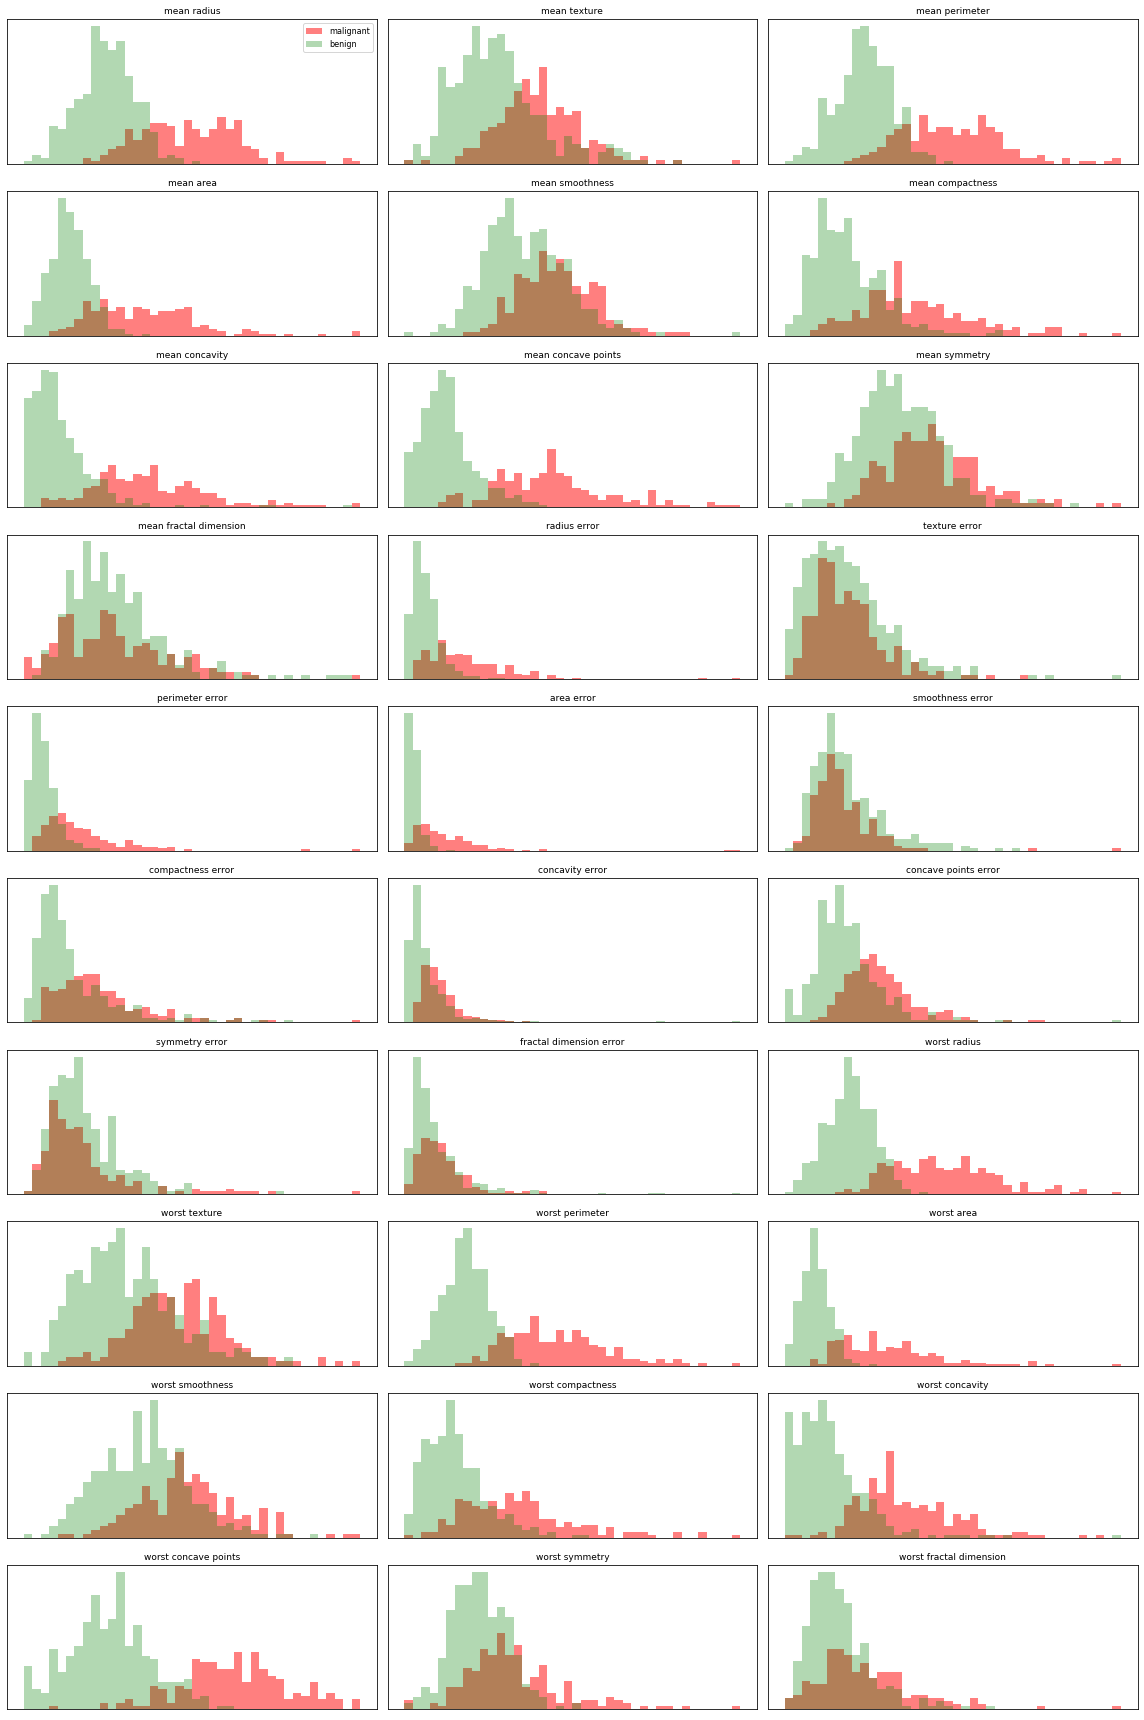

In [14]:
fig,axes =plt.subplots(10,3, figsize=(16, 24)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [37]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#instantiate
scaler.fit(cancer.data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(cancer.data)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("after scaling minimum", X_scaled.min(axis=0) )

after scaling minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [78]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (569, 5)


In [79]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio )

[0.52248073 0.2238903  0.11085435 0.07791575 0.06485886]


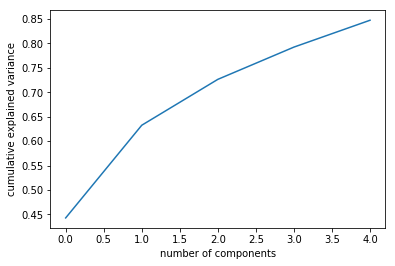

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

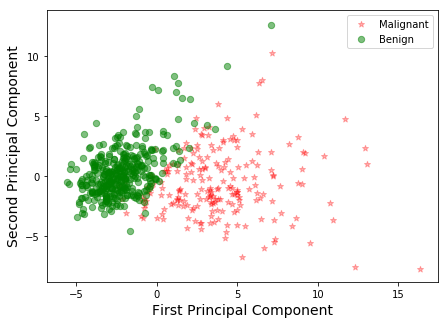

In [81]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

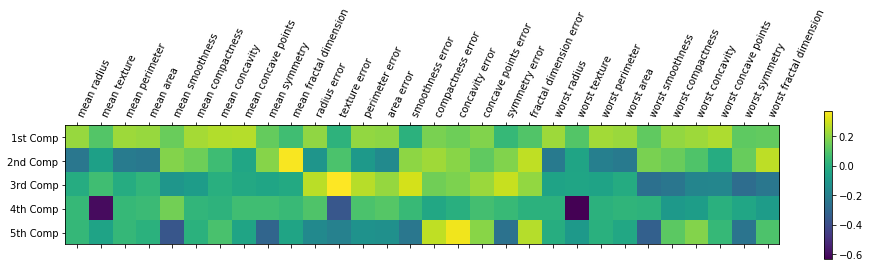

In [85]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.show()